# Time Series is a sequence of data points INDEXED in time order. 
For e.g. in case of stock price time series plot of a specific company we have date plotted over the x-axis while the stock prices are plotted over the y-axis. 

#### In this notebook, we are going to analyze the apple stock prices. For this we need to download the stock prices from Yahoo Finance. Goto their website: https://finance.yahoo.com/ > Search for "AAPL" > Click "Historical Data" > Specify period from Jan 01, 2018 to Dec 31, 2018, and the frequency as 'Daily' > Download Data > A *.csv file gets downloaded. 

# Load the data

In [1]:
import pandas as pd
df = pd.read_csv('AAP.csv')                             # The data read by read_csv() is in string format..
df.head()                                               

# The first column 'Date' too is in String format. Lets confirm this
print(type(df.Date[0]))                                 # [string] format...this is not desired!


<class 'str'>


# Reload data, this time ensuring that the Date column has proper format.

In [2]:
df = pd.read_csv('AAP.csv', parse_dates=["Date"])     # Observe the additional parameter added. 
print(df.head())
print(type(df.Date[0]))                               # [Timestamp] format. 

        Date        Open        High         Low       Close   Adj Close  \
0 2018-01-02  100.900002  107.930000   99.709999  106.089996  105.910828   
1 2018-01-03  106.419998  107.660004  105.300003  107.050003  106.869209   
2 2018-01-04  107.750000  111.529999  107.480003  111.000000  110.812538   
3 2018-01-05  111.959999  113.150002  110.300003  112.180000  111.990547   
4 2018-01-08  112.050003  112.290001  110.639999  111.389999  111.201874   

    Volume  
0  2624500  
1  2086800  
2  2104500  
3  1996700  
4  1257100  
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Again Reload the data and this time make "Date" as the index (row label) of the dataframe...
### This is a pre-requisite for time series problems. Currently index is the default [integer] index starting from 0.

In [3]:
df = pd.read_csv('AAP.csv', parse_dates=["Date"], index_col = "Date")
print(df.head())

# Verify whether "Date" was actaully set as index
print(df.index)

# Verify the type of this index
print(type(df.index))                                                    # [DatetimeIndex]


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  100.900002  107.930000   99.709999  106.089996  105.910828   
2018-01-03  106.419998  107.660004  105.300003  107.050003  106.869209   
2018-01-04  107.750000  111.529999  107.480003  111.000000  110.812538   
2018-01-05  111.959999  113.150002  110.300003  112.180000  111.990547   
2018-01-08  112.050003  112.290001  110.639999  111.389999  111.201874   

             Volume  
Date                 
2018-01-02  2624500  
2018-01-03  2086800  
2018-01-04  2104500  
2018-01-05  1996700  
2018-01-08  1257100  
DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-

# Benefits of having [DatetimeIndex]: Ensures easy slicing-dicing of data

In [4]:
# The Apple stock data that we have downloaded, contains records of the daily stock prices for the year 2018. 
# With the DatetimeIndex, we can slice the data as per our requirement. 

# Case [1]: For e.g. Say we are interested only in Jan 2018, apple stock prices
print(df['2018-01'])                         # we have specified a partial index here for slicing data.

# Case [2]: For e.g. we want to find the average Closing price of Apple's stock in Jan 2018. 
print(df['2018-01'].Close.mean())            # 115.30047490476193...Average stock price of Apple in Jan 2018. 

# Case [3]: For e.g. We want to get stock price details of a specific date say 31st Jan, 2018. 
print(df["2018-01-31":"2018-01-31"])

# Case [4]: For e.g. We want to get stock price details for a date range from say 31st Jan, 2018 to 5th May, 2018
print(df["2018-01-31" : "2018-05-05"])


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02  100.900002  107.930000   99.709999  106.089996  105.910828   
2018-01-03  106.419998  107.660004  105.300003  107.050003  106.869209   
2018-01-04  107.750000  111.529999  107.480003  111.000000  110.812538   
2018-01-05  111.959999  113.150002  110.300003  112.180000  111.990547   
2018-01-08  112.050003  112.290001  110.639999  111.389999  111.201874   
2018-01-09  111.690002  111.690002  109.809998  110.489998  110.303398   
2018-01-10  110.269997  112.000000  109.790001  110.589996  110.403221   
2018-01-11  110.699997  113.419998  108.900002  112.949997  112.759247   
2018-01-12  114.379997  116.050003  113.019997  115.940002  115.744202   
2018-01-16  116.760002  116.839996  112.860001  113.900002  113.707642   
2018-01-17  114.739998  116.239998  112.980003  115.349998  115.155190   
2018-01-18  115.669998  115.860001  11

# Resampling: 
The data we have collected are the DAILY stock prices for Apple Industries. Now say we are interested to study only average monthly stock prices. For this we need to resample our data. Select a column, for this transformation. Lets say we choose the 'Close' column. 

In [5]:
df.Close.resample('M').mean()       # Here 'M' refers to the "monthly" aggregation, followed by mean()
                                    # This is the monthly average of the closed stock price.  

Date
2018-01-31    115.300475
2018-02-28    110.953157
2018-03-31    116.206190
2018-04-30    110.116190
2018-05-31    120.012273
2018-06-30    134.468573
2018-07-31    139.817618
2018-08-31    154.761739
2018-09-30    167.662631
2018-10-31    164.798260
2018-11-30    174.099047
2018-12-31    161.953684
Freq: M, Name: Close, dtype: float64

# Plot the monthly average closing stock price of Apple.

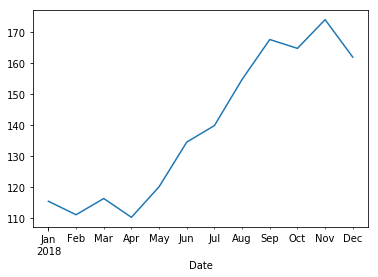

In [6]:
# We can take a shortcut and directly plot from Pandas, using the in-built WRAPPER for matplotlib
%matplotlib inline
df.Close.resample('M').mean().plot()

# Here the frequency of plotting can be customized depending upon the business needs:
# M - Month End Freq 
# MS- Month Start Freq
# SM- Semi Month End Freq [15th and End of Month]
# SMS-Semi Month Start Freq [1st and 15th]
# W - Weekly Freq
# Q - Quarter end Freq
# QS- Quarter Start Freq
# B - Business Day Freq
# A - Year end Freq
# AS- Year start Freq
# H - Hourly Freq
# T.min - Minutely Freq
# S - Secondly Freq

# Plot the Quarterly average closing stock price of Apple - Line Chart

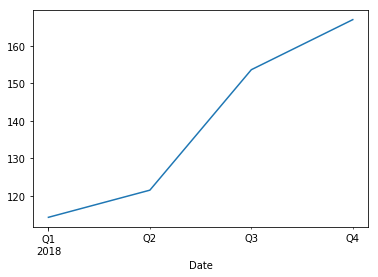

In [7]:
df.Close.resample('Q').mean().plot()   # We get the graph for quaterly data

# Plot the Quarterly average closing stock price of Apple - Bar Chart

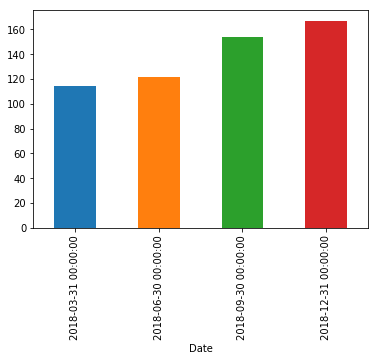

In [8]:
df.Close.resample('Q').mean().plot(kind = "bar")